In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


mpl.style.use('ggplot')
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rc('figure', figsize=(14, 10))#设置图片大小
sns.set_style('white')

%matplotlib inline
%run Constant.ipynb
%run Util.ipynb

class AssetPainter:
    
    def __init__(self):
        self.arrow_props = dict(arrowstyle='->', connectionstyle="arc3,rad=.2")
        
    def draw_init_cash_line(self,df,field):
        init_y = 100000 
        
        min_x = df[field][:1].values[0]
        max_x = df[field][df.shape[0]-1:].values[0]
        plt.hlines(init_y,min_x, max_x, colors = "g", linestyles = "dashed")
        
        
    def draw_operation_asset_bars(self,operations_file):
        operation_df = pd.read_csv(operations_file)
        
        plt.rc('figure', figsize=(14, 7))
        asset = operation_df['asset'].values
        x = operation_df['buy_date'].values
        
        plt.bar(x, asset,color='#FFC9B5')
        plt.plot(x, asset)
        self.draw_init_cash_line(operation_df,'buy_date')
        plt.show()
        
        return operation_df
    
    def draw_audit_asset_bars(self,asset_file):
        asset_df = pd.read_csv(asset_file)
                
        plt.rc('figure', figsize=(14, 7))
        asset = asset_df['assets'].values
        x = asset_df['date'].values
        
        plt.bar(x, asset,color='#FFC9B5')
        plt.plot(x, asset)
        self.draw_init_cash_line(asset_df,'date')
        plt.show()
        
        return asset_df
    
    def get_monthly_increase_per(self,account_asset_df):
        grouped = account_asset_df[['year-month','date','assets']].groupby(account_asset_df['year-month'])
        
        monthly_increase_per = []
        group_list = list(grouped)
        for item in group_list:
            row = item[1]
            
            asset_value_in_month_array = row['assets'].values
            first_day_asset = asset_value_in_month_array[0]
            last_day_asset = asset_value_in_month_array[-1]
            increase_per = round(100.0*(last_day_asset-first_day_asset)/first_day_asset,2)
            
            monthly_increase_per.append(increase_per)
        
        return monthly_increase_per
        
    
    def draw_month_profit_bars(self,asset_file,show_annotation):
        account_asset_df = pd.read_csv(asset_file)
        account_asset_df['year'] = account_asset_df['date'].apply(lambda x: x.split('-')[0])
        account_asset_df['month'] = account_asset_df['date'].apply(lambda x: x.split('-')[1])
        account_asset_df['year-month'] = account_asset_df['date'].apply(lambda x: x.split('-')[0]+'-'+x.split('-')[1])
        
        increase_per = self.get_monthly_increase_per(account_asset_df)
        
        plt.rc('figure', figsize=(14, 7))
        plt.bar(range(0,len(increase_per)), increase_per,color='#199870')
        
        if(show_annotation==True):
            index = 0
            for increase in increase_per:
                xy_coord = (index,increase)
                index += 1
                if(increase==0):
                    continue

                plt.annotate(s=str(increase), xy=xy_coord,
                             xycoords='data', xytext=(-5, 5),
                             textcoords='offset points', fontsize=12,
                             arrowprops=self.arrow_props)
        
        plt.show()
        

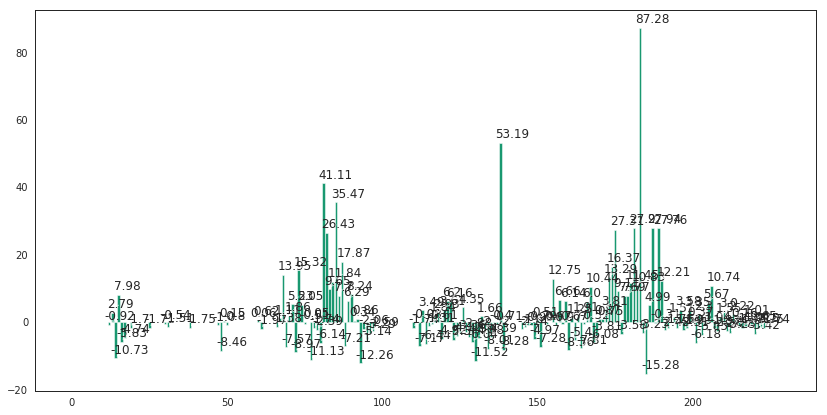

KeyboardInterrupt: 

In [3]:

def demo_multip_regression():
    painter = AssetPainter()

    asset_file = 'multip_stocks_account_asset_30_240_Day_V0.4.csv'
    painter.draw_month_profit_bars(report_dir+asset_file,show_annotation=False)
    painter.draw_audit_asset_bars(report_dir+asset_file)


# demo_multip_regression()



In [ ]:
def demo_single_regression():
    painter = AssetPainter()

    asset_file = 'account_asset_SZ#002033_20_240_Day_2019-05-30_V0.4.csv'
    painter.draw_month_profit_bars(report_dir+asset_file)
    painter.draw_audit_asset_bars(report_dir+asset_file)

    operation_file="operations_SZ#002033_20_240_Day_2019-05-30_V0.4.csv"
    painter.draw_operation_asset_bars(report_dir+operation_file)
